# Investigate TMDb dataset

( - By Shefali Mishra )

I used TMDb movies dataset for data analysis.

### Features -
1. It contains information about 10 thousand movies 
2. For each movie, there is description about popularity, revenue, budget, vote_count etc. In total there are 21 columns.

### Question that can analysed from this data set

1. Details of movie with highest and lowest profit
2. Detail analysis of movie runtime like it's distribution , average etc .
3. Factors affecting profit made by a movie. 
4. In which year most and least profit was made ?
5. Popular genres
6. Popular cast
7. Popular production
8. How few of the derived features help making a successful movie



In [256]:
# importing modules and loading csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

movies = pd.read_csv('tmdb-movies.csv')

# to get informnation about dataset before starting the analysis
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [257]:
# to check nature of value of each column
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


# Data Wrangling

For this phase, there are few things that should be kept in mind
1. Changing data type to appropriate data type
2. Drop unwanted columns that will not contribite to analysis 
3. Remove Duplicates
4. Replace NaN or 0 value with mean or median


In [258]:
# changing data type of release_date to datetime
movies['release_date']= pd.to_datetime(movies['release_date'],format='%m/%d/%y')

movies['release_date'].dtype

In [259]:
# confirming the change

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       


As we can see that the datatype of release_date is now datetime instead of string. 

Now we need to remove unwanted columns from our dataset.

I'll be using budget_adj and revenue_adj instead of budget and revenue as according to dataset description budget_adj and revenue_adj show budget and revenue associated movie in terms of 2010 dollars, accounting for inflation over time.

In [260]:
# dropping columns 'homepage','imdb_id','tagline','budget','revenue','overview','keywords' which I won't be using in
# my analysis



movies.drop(['homepage','imdb_id','tagline','budget','revenue','overview','keywords'],axis=1,inplace=True)

In [261]:
#confirming the changes

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.2+ MB



Now that we've changed the datatype and removed unwanted columns, it's time to remove all duplicate tuples from the dataset.


In [262]:
# finding total number of duplicates in dataset
sum(movies.duplicated())

1

In [263]:
# removing duplicates
movies.drop_duplicates(inplace=True)

In [264]:
# confirming the changes 
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.2+ MB


The total number of rows has now become 10865 from 10866 .

After investigating the dataset, it can be seen that a lot of entries have 0 value for budget_adj , revenue_adj and runtime or either of the three . There are three ways to deal with it -
1. Remove all entries with 0 value
2. Replace 0 with the median of that column
3. Replace 0 with the mean of that column

I've used here the second method as it gives more accurate answer.

In [265]:
movies['budget_adj'] = movies['budget_adj'].replace(0, movies['budget_adj'].median())

In [266]:
movies['revenue_adj'] = movies['revenue_adj'].replace(0, movies['revenue_adj'].median())

In [267]:
movies['runtime'] = movies['runtime'].replace(0, movies['runtime'].median())

# Exploring Data

When it comes to analysing data like this one, one main criteria is seeing how much profit the movie has made and how other features define profit .
So, the first step is to calculate profit. This can be done by subtracting the money invested in the movie(budget) from the total revenue made by the movie.

In [268]:
#creating new column profit in tha dataset
movies.insert(14,column='profit', value = movies['revenue_adj']-movies['budget_adj'])

In [269]:
#confirming the changes
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 1.3+ MB


### __Q.1 Which movie made the hightest and lowest profit ?__

In [270]:
#movie details with highest profit

movies.loc[movies['profit'].idxmax()]

id                                                                     11
popularity                                                        12.0379
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget_adj                                                    3.95756e+07
revenue_adj                           

In [271]:
#movie details with lowest profit

movies.loc[movies['profit'].idxmin()]

id                                                                  46528
popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                           

### __Q.2. Analysing runtime of movie__

First ,let's see its visualization -

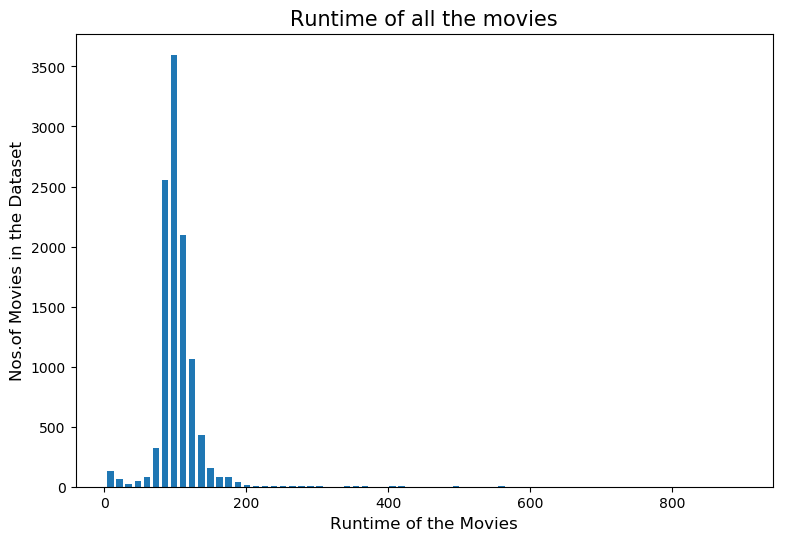

In [272]:

plt.figure(figsize=(9,6), dpi = 100)

#x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 12)

#y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=12)

#graph title
plt.title('Runtime of all the movies', fontsize=15)

#histogram plot
plt.hist(movies['runtime'], rwidth = 0.7, bins =70)

#displaying plot
plt.show()


The distrubution is _right skewed_ . Most of the movies have runtime between 80-120 min (almost 8000) with an average around 100 min.

Further, let's analyse it with box plot.

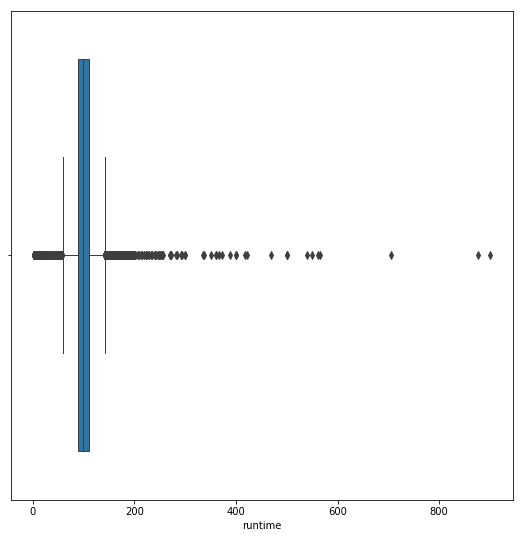

In [273]:

plt.figure(figsize=(9,9))

#using seaborn for boxplot
sns.boxplot(movies['runtime'], linewidth = 1)

#diplaying plot
plt.show()

From box plot we can predict that average is about 100 min and Q1(25%) and Q3(75%) are around -10 and +10 the average respectivly. 
Outliers could be seen in histogram but they are more clearly visible in box plot.

Now, let's look the actual description of runtime and compare it with our prediction from the visualization .

In [274]:
movies['runtime'].describe()

count    10865.000000
mean       102.354257
std         30.904560
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

Surprisingly , the values we predicted from visualization and the one which we obtained from exact calculation are somewhat same.

### __Q.3. Finding features contributing to more profit.__

First lets see the correlation of features with one another.
We can do it by creating a heat map. 

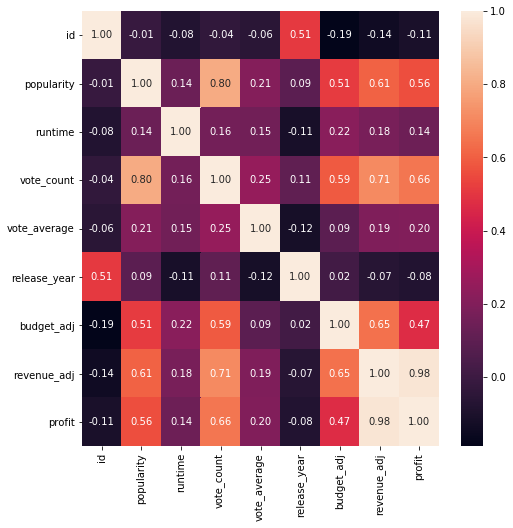

In [280]:
plt.figure(figsize=(8,8))
sns.heatmap(movies.corr(), annot=True, fmt=".2f")
plt.show()

From above heat map , we have two somewhat strong correlation -
1. profit and popularity are positively related - 0.56
2. profit and vote counts are positively related - 0.66

Lets see the scatterplot for further verification - 

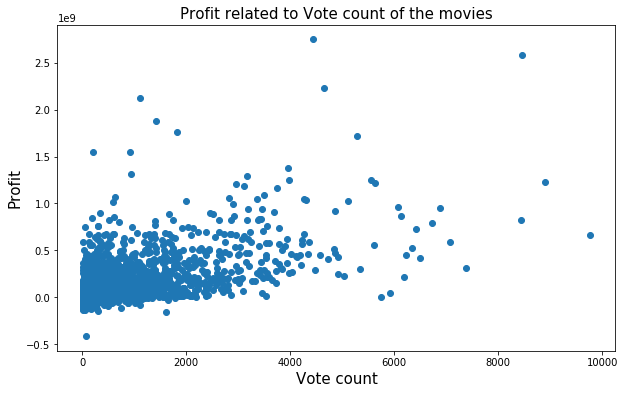

In [231]:
plt.figure(figsize=(10,6))

#x-axis 
plt.xlabel('Vote count', fontsize = 12)

#y-axis 
plt.ylabel('Profit', fontsize=12)

#graph title 
plt.title('Profit related to Vote count of the movies', fontsize=15)


#giving a histogram plot
plt.scatter(movies['vote_count'], movies['profit'])

#display plot
plt.show()



From above plot we can infer that with more vote count a movie tends to make more profit.

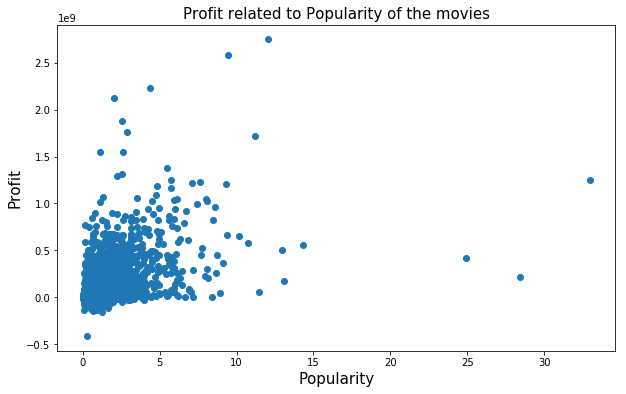

In [232]:
plt.figure(figsize=(10,6))

#x-axis 
plt.xlabel('Popularity', fontsize = 12)

#y-axis 
plt.ylabel('Profit', fontsize=12)

#graph title
plt.title('Profit related to Popularity of the movies', fontsize=15)


#giving a histogram plot
plt.scatter(movies['popularity'], movies['profit'])

#display plot
plt.show()



Similarly, we can infer that more popular movies tends to make more profit.

###  Q.4. Lets see the net profit every year .

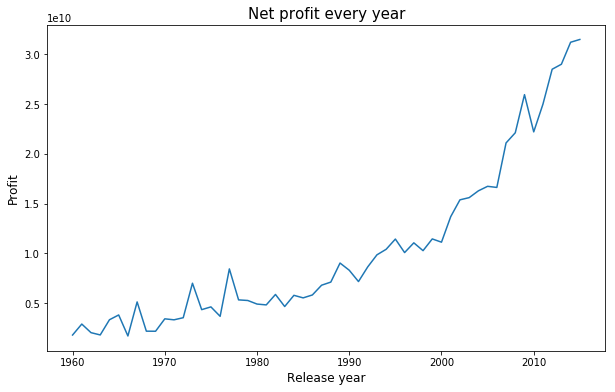

In [276]:
plt.figure(figsize=(10,6))

# x-axis 
plt.xlabel('Release year', fontsize = 12)

# y-axis 
plt.ylabel('Profit', fontsize=12)

#graph title
plt.title('Net profit every year', fontsize=15)

plt.plot(profit)

Net profit is increasing every year with some ups and downs. 


__This leads us to the following questions-__
1. In which year max profit was made ?
2. In which year min profit was made ?


In [277]:
# year with max profit

profit = movies.groupby(['release_year'])['profit'].sum()
profit.idxmax()

2015

In [278]:
# year with min profit

profit.idxmin()

1966

Now that we've seen how various statistical parameters are related to net profit, lets analyses some other features like most popular genres, actors and production company that are more likely to give more successful movies .

### Q.5 Most successful genres

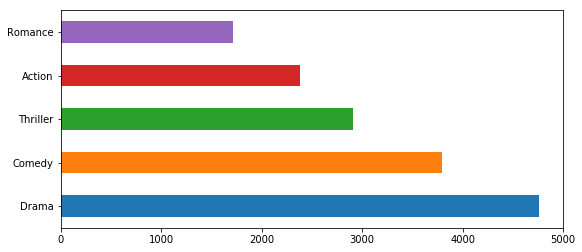

In [244]:
# Finding 5 most popular genres of which movies are made

genres = movies["genres"].str.cat(sep="|").split("|")
table=pd.Series(genres).value_counts()[:5]
table.plot.barh(figsize=(9,4))

_Drama_ remains the most popular genre of all time.


### Q.6. Most successful production companies


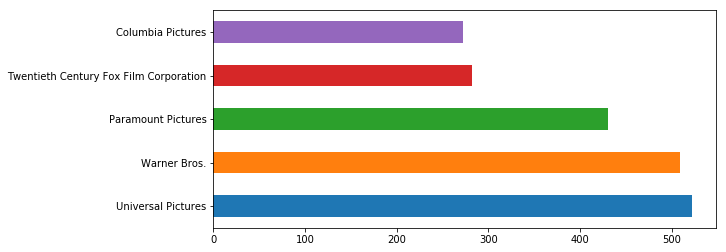

In [249]:
# Finding 5 most popular Production companies who makes movies 

production = movies["production_companies"].str.cat(sep="|").split("|")
table=pd.Series(production).value_counts()[:5]
table.plot.barh(figsize=(9,4))


_Universal Pictures_ is the most popular production companies.


### Q7. Most popular actors



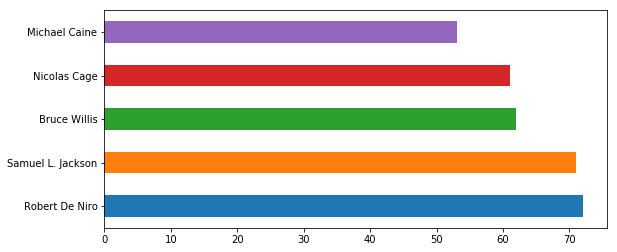

In [279]:
# Finding 5 most popular actors who makes movies 

cast = movies["cast"].str.cat(sep="|").split("|")
table=pd.Series(cast).value_counts()[:5]
table.plot.barh(figsize=(9,4))

_Robert De Niro_ is the most popular production companies.


### Q.8. Few  other average values


In [252]:
# average budget

movies['budget_adj'].mean()

17549894.037320547

In [253]:
# average revenue

movies['revenue_adj'].mean()

51369001.75884263

## Conclusion

For a movie to be more successful , these conditions can apply - 
1. It should have either of the top 5 actors .
2. It should be produced from either of the top 5 production company
3. And/or it should be of either of the top 5 genres that we derived from the database.
4. And it should be made almost 100 min long and have average budget to get an average revenue .

Note : There is no direct relation between profit and popular actor,genres or production company. Athough we got name of the actors contributed most in film industry and the production companies with most popular movies

### Limitations 
Some values are missing in the data set which affects the data description values like mean ,meadian etc.